Project Planning individual

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
player_file <- read_csv("players.csv") 
#head()
player_file

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


How does experience level play a role in the relationship between age and hours played.

In [3]:
players_clean <- player_file |>
select(experience, Age, played_hours)
players_clean

experience,Age,played_hours
<chr>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0
Regular,19,0.0
Amateur,21,0.0
Amateur,47,0.1


we need to make there is no missing values because it 

In [4]:
summary(players_clean)

  experience             Age         played_hours    
 Length:196         Min.   : 9.00   Min.   :  0.000  
 Class :character   1st Qu.:17.00   1st Qu.:  0.000  
 Mode  :character   Median :19.00   Median :  0.100  
                    Mean   :21.14   Mean   :  5.846  
                    3rd Qu.:22.75   3rd Qu.:  0.600  
                    Max.   :58.00   Max.   :223.100  
                    NA's   :2                        

In [5]:
players_clean <- players_clean |>
filter(!is.na(Age), !is.na(played_hours))
players_clean

experience,Age,played_hours
<chr>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0
Regular,19,0.0
Amateur,21,0.0
Amateur,47,0.1


In [6]:
group_players <- players_clean |>
group_by(experience) |>
summarise(
    avg_hours = mean(played_hours),
    avg_age = mean(Age),
    n = n())
group_players

experience,avg_hours,avg_age,n
<chr>,<dbl>,<dbl>,<int>
Amateur,6.0174603,21.36508,63
Beginner,1.2485714,21.65714,35
Pro,2.7846154,16.92308,13
Regular,18.7257143,22.02857,35
Veteran,0.6479167,20.95833,48


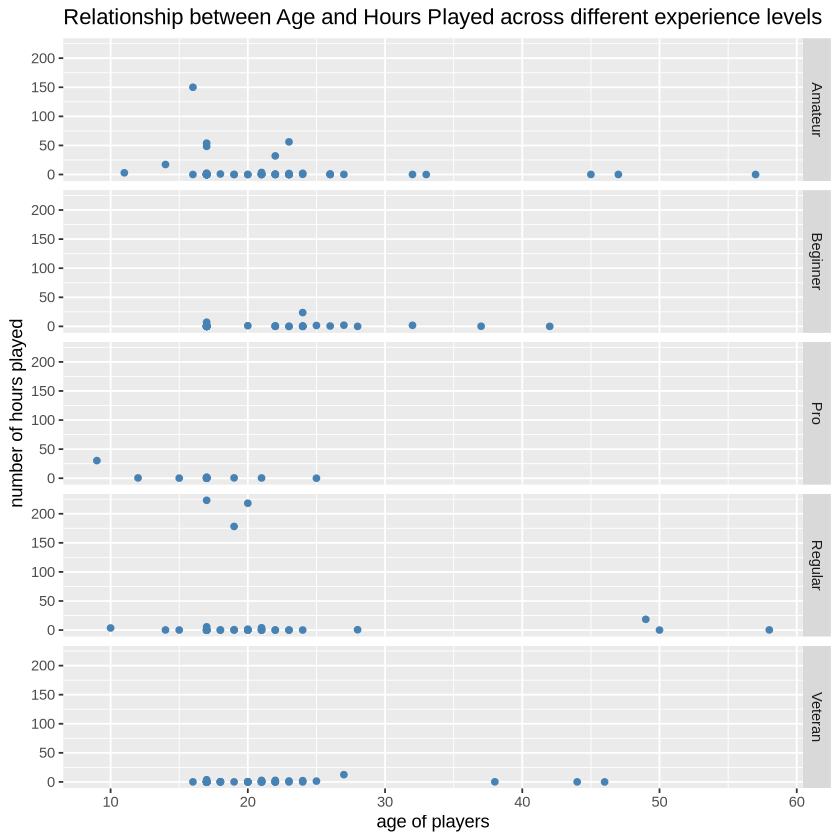

In [7]:
players_graphs <- players_clean |>
ggplot(aes( x = Age, y = played_hours)) +
geom_point(colour = "steelblue") +
facet_grid(rows = vars(experience)) +
labs(
    x = "age of players",
    y = "number of hours played",
    title = "Relationship between Age and Hours Played across different experience levels")
players_graphs

In [8]:
players_under_30 <- players_clean |>
filter(Age <= 30)
players_under_30

experience,Age,played_hours
<chr>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0
Regular,19,0.0
Amateur,21,0.0
Veteran,22,0.0


In [10]:
players_under_graph <- players_under_30 +
ggplot(aes(x = Age, y = played_hours)) +
geom_point(color = "steelblue") +
facet_grid(rows = vars(experience)) +
labs(
    x = "age of players (less than 30)",
    y = "number of hours played across different experience levels",
    title = "relationship between age(<30) and hours played")
players_under_graph

ERROR: [1m[33mError[39m in `fortify()`:[22m
[1m[22m[33m![39m `data` must be a [34m<data.frame>[39m, or an object coercible by `fortify()`,
  or a valid [34m<data.frame>[39m-like object coercible by `as.data.frame()`, not a
  <uneval> object.
[36mℹ[39m Did you accidentally pass `aes()` to the `data` argument?
